In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from  zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers


In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails=json.load(open('kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME']=kaggle_credentails['username']
os.environ['KAGGLE_KEY']=kaggle_credentails['key']

In [ ]:
#!/bin/bash
!kaggle datasets download abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:27<00:00, 324MB/s]
100% 2.04G/2.04G [00:27<00:00, 80.5MB/s]


In [ ]:
!ls

drive  kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
with ZipFile("plantvillage-dataset.zip",'r')as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir('plantvillage dataset'))

print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])


['segmented', 'grayscale', 'color']
38
['Pepper,_bell___Bacterial_spot', 'Potato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Strawberry___Leaf_scorch', 'Apple___Black_rot']
38
['Pepper,_bell___Bacterial_spot', 'Potato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Strawberry___Leaf_scorch', 'Apple___Black_rot']
38
['Pepper,_bell___Bacterial_spot', 'Potato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Strawberry___Leaf_scorch', 'Apple___Black_rot']


In [ ]:
print(len(os.listdir('plantvillage dataset/color/Grape___healthy')))
print(os.listdir('plantvillage dataset/color/Grape___healthy')[:5])

423
['a889fb1b-e7cb-4026-a42e-a09558e00ca8___Mt.N.V_HL 9020.JPG', '508d0cc9-05ef-488a-aa84-1f28073954d4___Mt.N.V_HL 6163.JPG', 'eaf9de03-6ec6-453b-9cd1-38d5d3337ea3___Mt.N.V_HL 8951.JPG', '4b266fb8-a762-4073-a9e2-25a3861115c4___Mt.N.V_HL 6152.JPG', '8a3ee8ca-0e55-4c2d-8a43-348431c9f60d___Mt.N.V_HL 6126.JPG']


In [ ]:
base_dir='plantvillage dataset/color'

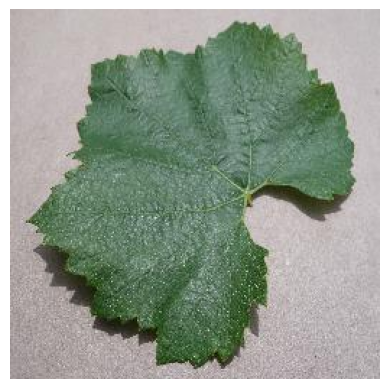

In [ ]:
image_path='/content/plantvillage dataset/color/Grape___healthy/670313f0-b36a-4151-9d81-ae1cd9ee812c___Mt.N.V_HL 6092.JPG'
img= mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
print(img.shape)

(256, 256, 3)


In [ ]:
image_resize=224
batch_size=32

In [ ]:
#ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

In [ ]:
#train generator
train_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(image_resize,image_resize),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',

)

Found 43456 images belonging to 38 classes.


In [ ]:
#validation generator
validation_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(image_resize,image_resize),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(image_resize,image_resize,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 98s 67ms/step - accuracy: 0.6004 - loss: 1.6297 - val_accuracy: 0.8628 - val_loss: 0.4515
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.9186 - loss: 0.2559 - val_accuracy: 0.8760 - val_loss: 0.3953
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 89s 65ms/step - accuracy: 0.9663 - loss: 0.1060 - val_accuracy: 0.8766 - val_loss: 0.4527
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 93s 69ms/step - accuracy: 0.9793 - loss: 0.0631 - val_accuracy: 0.8783 - val_loss: 0.5015
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 91s 67ms/step - accuracy: 0.9796 - loss: 0.0642 - val_accuracy: 0.8844 - val_loss: 0.5602


In [ ]:
#model evaluate
print("evluating model ,,,,")
val_loss,val_accuracy=model.evaluate(validation_generator,steps=validation_generator.samples//batch_size)
print("validation loss:",val_loss)
print("validation accuracy:",val_accuracy)

evluating model ,,,,
339/339 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.8527 - loss: 0.6606
validation loss: 0.6394826769828796
validation accuracy: 0.8578540086746216


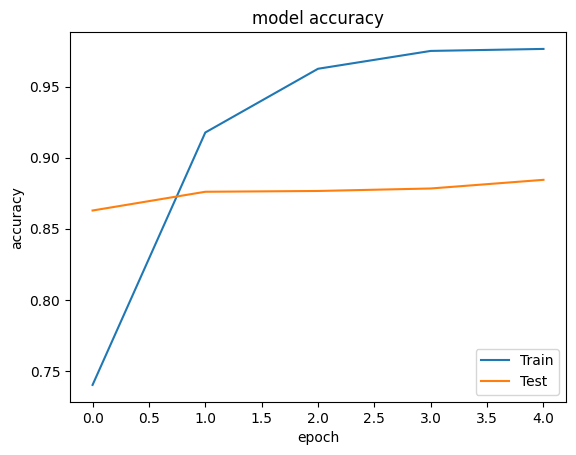

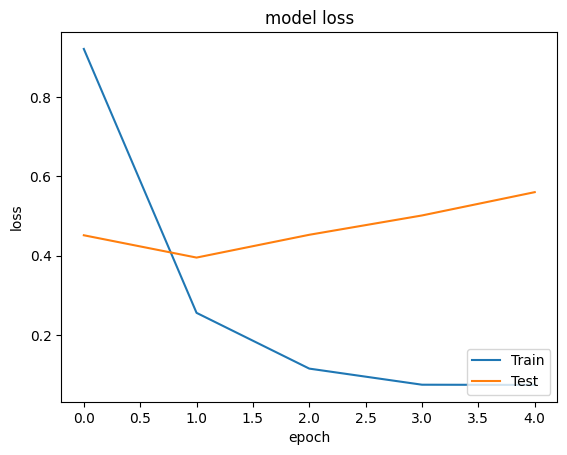

In [ ]:
# plot training et validation
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='lower right')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='lower right')
plt.show()
#

In [ ]:
# function to load and preprocess the Image using pillow
def load_and_preprocess_image(image_path,target_size=(224,224)):
   img=Image.open(image_path).convert("RGB")
   img=img.resize(target_size)
   img=np.array(img,dtype=np.float32)
   img=img / 255.0
   img = np.expand_dims(img, axis=0)
   return img
def predict_image_class(model,image_path,class_indices):
  preprocessed_img=load_and_preprocess_image(image_path)
  predictions=model.predict(preprocessed_img)
  predicted_class_index=np.argmax(predictions,axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
print(class_indices)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [ ]:
json.dump(class_indices,open('class_indices.json','w'))

In [ ]:
image_path='/content/plantvillage dataset/color/Grape___healthy/670313f0-b36a-4151-9d81-ae1cd9ee812c___Mt.N.V_HL 6092.JPG'


In [ ]:
predicted_class_name=predict_image_class(model,image_path,class_indices)
print("predicted class name:",predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted class name: Grape___healthy


In [31]:
model.save('G:/Mon Drive/Colab Notebooks/plante_disease_prediction_model.keras')

In [32]:
from google.colab import drive
drive.mount('/content/drive')

# Vérifier si le fichier existe
import os
path = '/content/drive/My Drive/Colab Notebooks/plante_disease_prediction_model.keras'
if os.path.exists(path):
    print("✅ Fichier trouvé !")
    print(f"Emplacement : {path}")
    print(f"Taille : {os.path.getsize(path)} octets")
else:
    print("❌ Fichier non trouvé à cet emplacement")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
❌ Fichier non trouvé à cet emplacement


In [33]:
# 1. Sauvegarder LOCALEMENT dans Colab d'abord
model.save('/content/plante_disease_prediction_model.keras')

# 2. Vérifier que ça a fonctionné
import os
if os.path.exists('/content/plante_disease_prediction_model.keras'):
    file_size = os.path.getsize('/content/plante_disease_prediction_model.keras')
    print(f"✅ Modèle sauvegardé avec succès ! Taille : {file_size} octets")

    # 3. Télécharger DIRECTEMENT sur votre PC
    from google.colab import files
    files.download('/content/plante_disease_prediction_model.keras')
    print("📥 Téléchargement démarré - une fenêtre s'ouvre pour enregistrer sur votre PC")
else:
    print("❌ La sauvegarde a échoué")

✅ Modèle sauvegardé avec succès ! Taille : 573698839 octets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Téléchargement démarré - une fenêtre s'ouvre pour enregistrer sur votre PC


In [35]:
# Convertir en TensorFlow Lite (beaucoup plus léger)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Sauvegarder le modèle Lite
with open('/content/model_plantes.tflite', 'wb') as f:
    f.write(tflite_model)

# Télécharger (beaucoup plus petit !)
files.download('/content/model_plantes.tflite')
print("✅ Modèle TensorFlow Lite prêt - taille réduite significativement")

Saved artifact at '/tmp/tmpwi2z4ddh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  132586356265360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586356266512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586356264400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586356264016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586356268816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586356269584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586356269008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132586356269776: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Modèle TensorFlow Lite prêt - taille réduite significativement


In [ ]:
from google.colab import files
files.download('/content/plante_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>